In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
# case_studies = [
#     "1h-none-noSUSD",
#     "1h-expensive-relaxedSUSD",
#     "1h-expensive-tightSUSD",
#     "2h-none-noSUSD",
#     "2h-expensive-relaxedSUSD",
#     "2h-expensive-tightSUSD",
#     "3h-none-noSUSD",
#     "3h-expensive-relaxedSUSD",
#     "3h-expensive-tightSUSD",
#     "4h-none-noSUSD",
#     "4h-expensive-relaxedSUSD",
#     "4h-expensive-tightSUSD",
#     "5h-none-noSUSD",
#     "5h-expensive-relaxedSUSD",
#     "5h-expensive-tightSUSD",
#     "geographical-none-noSUSD",
#     "geographical-expensive-relaxedSUSD",
#     "geographical-expensive-tightSUSD",
# ]

case_studies = [
#     "1h-none-noSUSD",
#     "1h-cheap-relaxedSUSD",
#     "1h-cheap-tightSUSD",
#     "1h-expensive-relaxedSUSD",
#     "1h-expensive-tightSUSD",
#     "2h-none-noSUSD",
#     "2h-cheap-relaxedSUSD",
#     "2h-cheap-tightSUSD",
#     "2h-expensive-relaxedSUSD",
#     "2h-expensive-tightSUSD",
#     "3h-none-noSUSD",
#     "3h-cheap-relaxedSUSD",
#     "3h-cheap-tightSUSD",
#     "3h-expensive-relaxedSUSD",
#     "3h-expensive-tightSUSD",
#     "4h-none-noSUSD",
#     "4h-cheap-relaxedSUSD",
#     "4h-cheap-tightSUSD",
#     "4h-expensive-relaxedSUSD",
#     "4h-expensive-tightSUSD",
#     "5h-none-noSUSD",
#     "5h-cheap-relaxedSUSD",
#     "5h-cheap-tightSUSD",
#     "5h-expensive-relaxedSUSD",
#     "5h-expensive-tightSUSD",
    "geobig-none-noSUSD",
    "geobig-cheap-relaxedSUSD",
    "geobig-cheap-tightSUSD",
    "geobig-expensive-relaxedSUSD",
    "geobig-expensive-tightSUSD",
]

In [3]:
input_file = open ('output.json')
json_array = json.load(input_file)

# json_array

In [4]:
stripped_data = json_array[1][0][1]['data']
# stripped_data

In [5]:
# for key in stripped_data:
#     print(key)
#     print(stripped_data[key], '\n')

In [6]:
run_model = stripped_data['run_model'][1]['data']

# run_model

In [7]:
run_model_times = np.array([run_model[case_study][1]['times'] for case_study in case_studies])

In [8]:
# run_model_times

In [9]:
run_model_means = np.mean(run_model_times, axis=1) / (1e9)
run_model_means

array([ 54.92478572,  70.45721717, 111.55590781,  18.98901316,
        29.89154682,  30.81085781,  10.51876825,  15.66367942,
        16.81928551,   5.70779752,   9.9925768 ,   9.64468585,
         3.46387877,   3.72855594,   4.56084272, 101.38607937,
       158.88448521, 212.70396388])

In [10]:
case_studies_labels = ['none', 'tight', 'relaxed', 'none', 'tight', 'relaxed', 'none', 'tight', 'relaxed', 'none', 'tight', 'relaxed', 'none', 'tight', 'relaxed', 'none', 'tight', 'relaxed']

In [11]:
objective_values = [4.705879153523034e11, 4.705837752905728e11, 4.70584136617439e11, 4.669855539080964e11, 4.6697735677232733e11, 4.6698504097514044e11, 4.250391948119547e11, 4.250128374928639e11, 4.250386968757886e11]

In [12]:
# indixes = [x for x in range(len(case_studies)) if x % 5 in [0, 3, 4]]
# print(indixes)

# expensive_means = run_model_means[indixes]
# expensive_means

expensive_means = run_model_means

In [13]:
def plot_times(run_model_means, title):
    width = 0.2
    x = np.arange(len(run_model_means) / 3)

    fig, ax = plt.subplots()

    bar1 = ax.bar(x - width, run_model_means[0::3], width, label='No SU/SD costs')
    bar2 = ax.bar(x, run_model_means[1::3], width, label='Compact constraints')
    bar3 = ax.bar(x + width, run_model_means[2::3], width, label='Full constraints')


    ax.legend()

    #setting bar labels
    plt.rcParams.update({'font.size': 6})
    
    ax.bar_label(bar1, fmt='%.1f')
    ax.bar_label(bar2, fmt='%.1f')
    ax.bar_label(bar3, fmt='%.1f')
    
    plt.rcParams.update({'font.size': 10})

    plt.title(title)
    plt.ylabel("Average model runtime [s]")
    plt.xlabel("Temporal resolution")

    fig.tight_layout()

    # ax.set_xticks(x, ['2h uniform resolution', '4h uniform resolution', '6h uniform resolution'])
    ax.set_xticks(x, ['1h uniform', '2h uniform', '3h uniform', '4h uniform', '5h uniform', 'geographical'])


    ########################################################################

    # ax2 = ax.twinx()
    # ax2.set_ylabel("Objective function value [1e11 EUR]", color='tab:red')
    # ax2.tick_params(axis='y', labelcolor='tab:red')

    # min_obj = min(objective_values)
    # max_obj = max(objective_values)

    # # Add a small margin to the min and max
    # margin = (max_obj - min_obj) * 1  # 10% padding

    # ax2.set_ylim(min_obj - margin, max_obj + margin)


    # Plot objective values as lines + markers
    offsets = [-width, 0, width]
    labels = ['No SU/SD', 'Tight SU/SD', 'Relaxed SU/SD']
    colors = ['#168FD899', '#DC740E99', '#75B76C99']

    # for i in range(3):
    #     obj_vals = objective_values[i::3]  # Every third starting at i
    #     ax2.scatter(x + offsets[i], obj_vals, label=f'{labels[i]} Obj', color=colors[i], edgecolors='black')

    # Combine legends from both axes
    plt.rcParams.update({'font.size': 10})

    lines1, labels1 = ax.get_legend_handles_labels()
    # lines2, labels2 = ax2.get_legend_handles_labels()
    # ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    ax.legend(lines1, labels1, loc='upper right')
    # bar2 = ax.bar(['d', 'e', 'f'], run_model_means[3:], label='two')

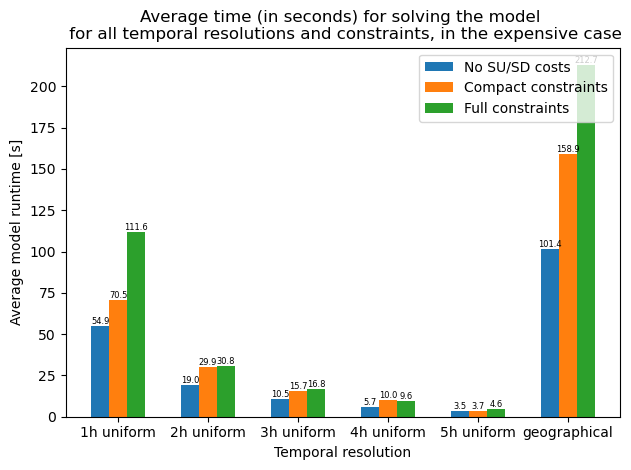

In [14]:
plot_times(expensive_means, "Average time (in seconds) for solving the model \n for all temporal resolutions and constraints, in the expensive case")

In [15]:
indixes = [x for x in range(len(case_studies)) if x % 5 not in [3, 4]]
print(indixes)

cheap_means = run_model_means[indixes]
cheap_means

[0, 1, 2, 5, 6, 7, 10, 11, 12, 15, 16, 17]


array([ 54.92478572,  70.45721717, 111.55590781,  30.81085781,
        10.51876825,  15.66367942,   9.9925768 ,   9.64468585,
         3.46387877, 101.38607937, 158.88448521, 212.70396388])

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (6).

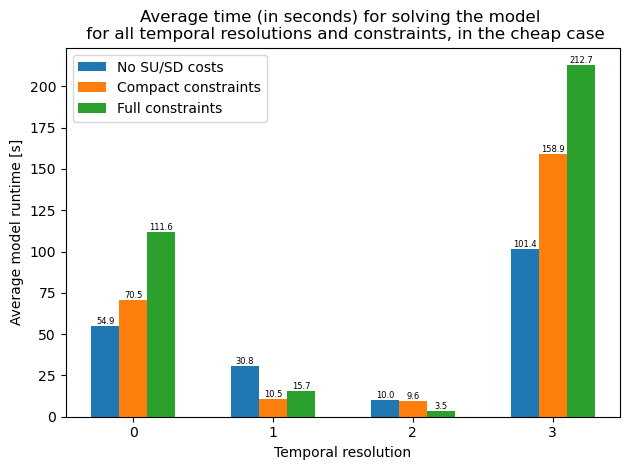

In [16]:
plot_times(cheap_means, "Average time (in seconds) for solving the model \n for all temporal resolutions and constraints, in the cheap case")

In [ ]:
# plt.bar(case_studies, run_model_means)
# # case_studies = ['10-rps-uniform-2h-noUC', '10-rps-uniform-2h-eq7UC', '10-rps-uniform-2h-eq9UC', '10-rps-uniform-4h-noUC', '10-rps-uniform-4h-eq7UC', '10-rps-uniform-4h-eq9UC']

In [ ]:
# width = 0.3
# x = np.arange(len(case_studies) / 3)

# fig, ax = plt.subplots()

# bar1 = ax.bar(x - width, create_model_means[0::3], width, label='noUC')
# bar2 = ax.bar(x, create_model_means[1::3], width, label='eq7UC')
# bar3 = ax.bar(x + width, create_model_means[2::3], width, label='eq9UC')


# ax.legend()

# #setting bar labels
# ax.bar_label(bar1, fmt='%.2f')
# ax.bar_label(bar2, fmt='%.2f')
# ax.bar_label(bar3, fmt='%.2f')

# plt.title("Model runtimes")
# plt.ylabel("Time [s]")

# ax.set_xticks(x, ['2h uniform', '4h uniform'])

In [ ]:
my_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
my_list[1::3]

In [ ]:
np.mean(np.array(run_model['1h-expensive-relaxedSUSD'][1]['times'])) / 1e9

In [ ]:
np.array(case_studies)[indixes][1::3]

In [ ]:
fig, ax = plt.subplots()

b1 = ax.bar(0, run_model_means[0])
b2 = ax.bar(1, run_model_means[1])
b3 = ax.bar(2, run_model_means[2])
b4 = ax.bar(3, run_model_means[3])
b5 = ax.bar(4, run_model_means[4])

ax.bar_label(b1, fmt='%.1f')
ax.bar_label(b2, fmt='%.1f')
ax.bar_label(b3, fmt='%.1f')
ax.bar_label(b4, fmt='%.1f')
ax.bar_label(b5, fmt='%.1f')

plt.title( "Average time (in seconds) for solving the extended EU model\nwith the geographical temporal resolution")

plt.xticks([0, 1, 2, 3, 4], ['no SU/SD', 'compact\ncheap', 'full\ncheap', 'compact\nexpensive', 'full\nexpensive'])
plt.xlabel("SU/SD constraints and costs")
plt.ylabel("Average model runtime [s]")
